# 1. Problema de negócio

Atualmente, a previsão de vendas não é suficientemente precisa para direcionar a produção de forma eficiente. Isso pode levar a desajustes entre a oferta e a demanda, resultando em excesso ou falta de estoque. Por conta disso é necessário criar medidas para poder analisar os produtos que devem ser fabricados e quando deve fabricá-los.


## 1.1. Resultado Esperado

Desenvolver e implementar um modelo avançado de previsão de vendas que permita uma estimativa precisa da demanda. Este modelo auxiliará na escolha de quais produtos devem ser fabricados e os momentos ideais para sua produção. A partir dessa previsão, a indústria conseguirá alinhar a produção com a demanda real, otimizando a gestão de estoque e evitando tanto excessos quanto faltas.

# 2 - Entendimento dos dados e Formulação de Hipóteses

## 2.1. Variáveis

| **Feature**              | **Tipo Variável** | **Descrição**                                                |
|--------------------------|--------------------|--------------------------------------------------------------|
| COD_CICLO                | Ordinal            | Indicação de período definido por marketing                  |
| FLG_DATA_COMEMORATIVA    | FLAG               | Indicação se o ciclo pertence a alguma data comemorativa nacional |
| COD_MATERIAL             | Categórica         | Código referente ao material - SKU                           |
| COD_CANAL                | Categórica         | Em qual canal de vendas foi efetuada a venda do período       |
| DES_CATEGORIA_MATERIAL   | Categórica         | Qual a categoria do material                                 |
| DES_MARCA_MATERIAL       | Categórica         | Qual a marca do material                                     |
| COD_REGIAO               | Categórica         | Região a qual foi efetuada a venda                           |
| QT_VENDA_BRUTO           | Continua           | Quantidade de itens vendidos                                |
| QT_DEVOLUCAO             | Continua           | Quantidade de itens devolvidos                              |
| VL_RECEITA_BRUTA         | Continua           | Valor da receita bruta                                      |
| VL_RECEITA_LIQUIDA       | Continua           | Valor da receita líquida                                    |
| FLG_CAMPANHA_MKT_A       | FLAG               | Campanha de Marketing - TIPO A                              |
| FLG_CAMPANHA_MKT_B       | FLAG               | Campanha de Marketing - TIPO B                              |
| FLG_CAMPANHA_MKT_C       | FLAG               | Campanha de Marketing - TIPO C                              |
| FLG_CAMPANHA_MKT_D       | FLAG               | Campanha de Marketing - TIPO D                              |
| FLG_CAMPANHA_MKT_E       | FLAG               | Campanha de Marketing - TIPO E                              |
| PCT_DESCONTO             | Continua           | Percentual de desconto feito por Marketing                   |
| VL_PRECO                 | Continua           | Valor do preço do Produto                                    |


# 3. Coleta e preparação dos dados

## 3.1. Instalação das bibliotecas

In [1]:
"""

# Analise de correlações: seaborn

# Remoção de acentos: unidecode
"""

import os
import sys
import subprocess

libraries = ["seaborn", "matplotlib", "pandas", "unidecode"]


for lib in libraries:
    try:
        __import__(lib)
        print(f"{lib} já esta instalado.")
    except ImportError:
        print(f"{lib} não encontrado. Iniciando a instalação")
        subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
        print(f"{lib} instalado com sucesso.")
    

seaborn já esta instalado.
matplotlib já esta instalado.
pandas já esta instalado.
unidecode já esta instalado.


## 3.2. Importando as bibliotecas e setando funções 

In [2]:
from unidecode import unidecode

from matplotlib import pyplot as plt
from datetime import datetime, timedelta

import pandas as pd
import seaborn as sns


In [3]:
def plot_histograms(categoric_cols, n_cols):
    """
    Cria os gráficos de histogramas para as colunas categóricas    
    """
    
    # Definindo o número de colunas para o grid
    n_rows = len(categoric_cols) // n_cols + (len(categoric_cols) % n_cols > 0)
    
    # Criando as figuras
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    
    # Transforma o array de eixos em uma lista unidimensional para facilitar a iteração
    axes = axes.flatten()
    
    # Criando os gráficos de contagem
    for i, col in enumerate(categoric_cols):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=90)
    
    # Remove os gráficos vazios
    for j in range(len(categoric_cols), len(axes)):
        fig.delaxes(axes[j])
        
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [4]:
def plot_histograms_frequentes(df, categoric_cols, n_cols, quantidade):
    """
    Cria os gráficos de histogramas para as colunas categóricas,
    mostrando apenas os valores mais frequentes de acordo com a quantidade especificada no parâmetro da função

    """
    
    # Definindo o número de linhas para o grid
    n_rows = len(categoric_cols) // n_cols + (len(categoric_cols) % n_cols > 0)
    
    # Criando as figuras
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    
    # Transforma o array de eixos em uma lista unidimensional para facilitar a iteração
    axes = axes.flatten()
    
    # Criando os gráficos de contagem
    for i, col in enumerate(categoric_cols):
        if col in df.columns:
            # Conta o número de ocorrências de cada valor
            count_df = df[col].value_counts().reset_index()
            count_df.columns = [col, 'Contagem']
            # Obtem os valores mais frequentes
            top_df = count_df.head(quantidade)
            
            # Plota o gráfico com os valores mais frequentes
            sns.barplot(data=top_df, x=col, y='Contagem', ax=axes[i])
            axes[i].set_title(f'Top {quantidade} de {col}')
            axes[i].tick_params(axis='x', rotation=90)
        else:
            axes[i].text(0.5, 0.5, f'Coluna {col} não encontrada', horizontalalignment='center', verticalalignment='center')
    
    # Remove os gráficos vazios
    for j in range(len(categoric_cols), len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()
    plt.close()


In [5]:
def plot_histograms_frequentes_pares(df, categoric_cols, n_cols, n_barras):
    """
    Cria gráficos para comparar a frequência de cada coluna categórica agrupada por pares de colunas,
    mostrando barras empilhadas das maiores quantidades, mas mantendo a quantidade total de valores.
    """
    
    # Número total de pares de colunas
    num_pares = len(categoric_cols) * (len(categoric_cols) - 1) // 2
    
    # Definindo o número de linhas para o grid
    n_rows = (num_pares + n_cols - 1) // n_cols  # Calcula o número de linhas necessárias

    # Criando as figuras e os eixos
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    
    # Garantindo que axes seja sempre uma lista de eixos
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes[0]
    else:
        axes = axes.flatten()
    
    # Índice para os eixos
    idx = 0
    
    # Comparando pares de colunas
    for i in range(len(categoric_cols)):
        for j in range(i + 1, len(categoric_cols)):
            col1 = categoric_cols[i]
            col2 = categoric_cols[j]
            
            if col1 in df.columns and col2 in df.columns:
                # Agrupa os dados por col1 e conta a frequência de col2
                grouped_df = df.groupby(col1)[col2].value_counts().unstack(fill_value=0).reset_index()
                
                # Derrete o DataFrame (transforma as colunas em linhas) para facilitar a ordenação e seleção
                melted_df = grouped_df.melt(id_vars=col1, var_name=col2, value_name='Contagem')
                                
                # Ordena os valores por contagem e pega os mais frequentes
                top_df = melted_df.sort_values(by='Contagem', ascending=False).head(n_barras)
                
                # Recria o DataFrame para empilhar as barras
                stacked_df = top_df.pivot(index=col1, columns=col2, values='Contagem').fillna(0)
                
                # Plota o gráfico de barras empilhadas
                ax = axes[idx]
                stacked_df.plot(kind='bar', stacked=True, ax=ax)
                
                ax.set_title(f'Distribuição de {col2} por {col1}')
                ax.set_xlabel(col1)
                ax.set_ylabel('Contagem')
                
                # Remove a legenda se presente
                if ax.get_legend() is not None:
                    ax.get_legend().remove()
                
                idx += 1
                if idx >= len(axes):
                    break
        if idx >= len(axes):
            break
    
    # Remove os gráficos vazios se houver
    for j in range(idx, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    plt.close()


In [6]:
def plot_boxplots(df, numeric_cols, n_cols):
    """
    Cria o boxplot das variáveis numéricas
    """
    
    
    # Calcula o número de linhas necessárias
    n_rows = len(numeric_cols) // n_cols + (len(numeric_cols) % n_cols > 0)
    
    # Criar a figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    
    # Iterar sobre cada coluna e criar o boxplot
    for i, col in enumerate(numeric_cols):
        row = i // n_cols
        col_idx = i % n_cols
        sns.boxplot(data=df, x=col, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(col)
    
    # Remover subplots vazios
    for j in range(i + 1, n_rows * n_cols):
        row = j // n_cols
        col_idx = j % n_cols
        fig.delaxes(axes[row, col_idx])
    
    plt.tight_layout()
    plt.show()
    plt.close()

In [7]:
def week_to_date(data, day=1):
    """
    Converte o ano e número da semana para o primeiro dia da semana
    """
    
    year = int(str(data)[:4])
    week = int(str(data)[4:])
    
    # Calcular o primeiro dia do ano
    start_date = datetime(year, 1, 1)
    
    # Ajustar para a primeira segunda-feira do ano
    start_date += timedelta(days=(7 - start_date.weekday()))
    
    # Calcular o início da semana desejada
    start_of_week = start_date + timedelta(weeks=week - 1)
    
    # Ajustar para o dia da semana (1 para segunda-feira, ..., 7 para domingo)
    target_date = start_of_week + timedelta(days=day - 1)
    
    return target_date

In [8]:
def plot_lineplots_categoria_frequentes(df, lista_colunas, coluna, quantidade):
    """
    Plota gráficos de linha comparando a coluna de data com as outras colunas especificadas.
    Mostra apenas os valores mais frequentes para cada coluna, considerando a quantidade especificada.
    """
    
    
    # Filtra as colunas para não incluir a coluna de data
    lista_colunas_v1 = [col for col in lista_colunas if col != coluna]

    num_colunas = len(lista_colunas_v1)
    n_cols = 2  # Número de colunas no grid
    n_rows = (num_colunas + n_cols - 1) // n_cols  # Calcula o número de linhas necessárias

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    axes = axes.flatten()  # Achata o array de eixos para facilitar a iteração

    for i, col in enumerate(lista_colunas_v1):
        if col in df.columns:
            # Agrupa os dados pela coluna de data e calcula a soma
            grouped_df = df.groupby([coluna])[col].sum().reset_index()
            
            # Para obter o top N valores mais frequentes, é necessário filtrar
            # Mas como estamos fazendo gráficos de linha, vamos mostrar todos os dados agrupados por data
            grouped_df = grouped_df.sort_values(by=col, ascending=False).head(quantidade)
            
            # Plota o gráfico de linha
            sns.lineplot(data=grouped_df, x=coluna, y=col, ax=axes[i], marker='o')
            axes[i].set_title(f'{col} ao longo do tempo')
            axes[i].tick_params(axis='x', rotation=45)  
        else:
            axes[i].text(0.5, 0.5, f'Coluna {col} não encontrada', horizontalalignment='center', verticalalignment='center')

    # Remove subplots não utilizados
    for j in range(num_colunas, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


In [9]:

def plot_multiple_lineplots(df, lista_colunas, coluna, grupo_analise):
    """
    Plota um gráfico de linha comparando diversas colunas com a coluna de data.
    Cada coluna será representada por uma linha diferente no gráfico.
    """
    
    # Filtra as colunas para não incluir a coluna de data
    lista_colunas_v1 = [col for col in lista_colunas if col != coluna]
    
    # Derrete o DataFrame para usar o Seaborn com `hue`
    melted_df = df.melt(id_vars=[coluna], value_vars=lista_colunas_v1, var_name='Categoria', value_name='Valor')
    
    # Plota o gráfico de linha
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=melted_df, x=coluna, y='Valor', hue='Categoria', marker='o')
    
    plt.title(f'Comparação de {grupo_analise} ao Longo do Tempo')
    plt.xlabel(coluna)
    plt.ylabel('Valor')
    plt.xticks(rotation=45)  # Ajusta o ângulo das labels do eixo x se necessário
    plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajusta a posição da legenda

    plt.tight_layout()
    plt.show()


In [10]:
def plot_with_multiple_scales_seaborn(df, lista_colunas, coluna, grupo_analise):
    """
    Plota um gráfico de linha comparando diversas colunas com a coluna de data.
    Cada coluna será representada por uma linha diferente no gráfico, com escalas diferentes.
    """
    
    # Filtra as colunas para não incluir a coluna de data
    lista_colunas_v1 = [col for col in lista_colunas if col != coluna]
    
    # Derrete o DataFrame para usar o Seaborn com `hue`
    melted_df = df.melt(id_vars=[coluna], value_vars=lista_colunas_v1, var_name='Categoria', value_name='Valor')
    
    # Criar o gráfico
    fig, ax1 = plt.subplots(figsize=(15, 7))

    # Plotar a primeira linha
    sns.lineplot(data=melted_df[melted_df['Categoria'] == lista_colunas_v1[0]], x=coluna, y='Valor', ax=ax1, color='b', label=lista_colunas_v1[0], marker='o', errorbar=None)
    ax1.set_xlabel(coluna)
    ax1.set_ylabel(lista_colunas_v1[0], color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Criar eixos secundários para colunas adicionais
    axes = {'ax1': ax1}
    for i, coluna_atual in enumerate(lista_colunas_v1[1:], start=2):
        ax = axes[f'ax{i-1}'].twinx() if i > 2 else ax1.twinx()
        sns.lineplot(data=melted_df[melted_df['Categoria'] == coluna_atual], x=coluna, y='Valor', ax=ax, color=sns.color_palette("tab10")[i-1], label=coluna_atual, marker='o', errorbar=None)
        ax.set_ylabel(coluna_atual)
        ax.tick_params(axis='y')
        axes[f'ax{i}'] = ax

    # Ajustar o layout para não sobrepor elementos
    fig.tight_layout()
    
    # Adicionar legendas
    lines = []
    labels = []
    for ax in axes.values():
        line, label = ax.get_legend_handles_labels()
        lines.extend(line)
        labels.extend(label)
    fig.legend(lines, labels, loc='upper left')
    
    plt.title(f'Comparação de {grupo_analise} ao Longo do Tempo')
    plt.xticks(rotation=45)  # Ajusta o ângulo das labels do eixo x se necessário

    plt.show()

## 3.3. Lendo o dataset

In [11]:
# Obtendo o dataset
df = pd.read_csv("dataset.csv", delimiter = ';')

df.head()

,COD_CICLO,FLG_DATA,COD_MATERIAL,COD_CANAL,DES_CATEGORIA_MATERIAL,DES_MARCA_MATERIAL,COD_REGIAO,QT_VENDA_BRUTO,QT_DEVOLUCAO,VL_RECEITA_BRUTA,VL_RECEITA_LIQUIDA,FLG_CAMPANHA_MKT_A,FLG_CAMPANHA_MKT_B,FLG_CAMPANHA_MKT_C,FLG_CAMPANHA_MKT_D,FLG_CAMPANHA_MKT_E,PCT_DESCONTO,VL_PRECO
0,201917,1,431148,anon_S0,anon_S2,anon_S3,anon_S1,"11934,000000",414.0,"431869,080000","431869,080000",0,0,0,0,0,NaN,"455,400000"
1,202005,0,177816,anon_S0,anon_S2,anon_S4,anon_S1,"540,000000",252.0,"27743,400000","27743,400000",0,0,0,0,0,NaN,"773,400000"
2,201901,0,171786,anon_S0,anon_S5,anon_S6,anon_S1,"54012,000000",1410.0,"962860,200000","962860,200000",0,1,0,0,0,"35,000000","341,400000"
3,201813,0,177774,anon_S7,anon_S2,anon_S8,anon_S1,"438,000000",NaN,"7608,600000","7608,600000",0,0,0,0,0,NaN,"450,900000"
4,202006,1,446592,anon_S0,anon_S5,anon_S9,anon_S1,"2760,000000",240.0,"83339,400000","83339,400000",0,0,0,0,0,NaN,"431,400000"


In [12]:
# Obtendo o dicionário com as informações das colunas
df_dictionario = pd.read_csv("dicionario de dados.csv", delimiter = ',', header = 1)

# Ajuste nos nomes das colunas para que fique minusculo, sem acento e sem espaço
df_dictionario.columns = [unidecode(x).lower().replace(" ", "_") for x in df_dictionario.columns]

df_dictionario.head()

,feature,tipo_variavel,descricao
0,COD_CICLO,Ordinal,Indicação de período definido por marketing
1,FLG_DATA_COMEMORATIVA,FLAG,Indicação se o ciclo pertence a alguma data co...
2,COD_MATERIAL,Categórica,Código referente ao material - SKU
3,COD_CANAL,Categórica,Em qual canal de vendas foi efetuada a venda d...
4,DES_CATEGORIA_MATERIAL,Categórica,Qual a categoria do material


# 4. Análise Exploratória de Dados

## 4.1. Visão geral

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173923 entries, 0 to 173922
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COD_CICLO               173923 non-null  int64  
 1   FLG_DATA                173923 non-null  int64  
 2   COD_MATERIAL            173923 non-null  int64  
 3   COD_CANAL               173923 non-null  object 
 4   DES_CATEGORIA_MATERIAL  173923 non-null  object 
 5   DES_MARCA_MATERIAL      173923 non-null  object 
 6   COD_REGIAO              173923 non-null  object 
 7   QT_VENDA_BRUTO          173923 non-null  object 
 8   QT_DEVOLUCAO            87164 non-null   float64
 9   VL_RECEITA_BRUTA        173923 non-null  object 
 10  VL_RECEITA_LIQUIDA      173923 non-null  object 
 11  FLG_CAMPANHA_MKT_A      173923 non-null  int64  
 12  FLG_CAMPANHA_MKT_B      173923 non-null  int64  
 13  FLG_CAMPANHA_MKT_C      173923 non-null  int64  
 14  FLG_CAMPANHA_MKT_D  

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COD_CICLO,173923.0,NaN,NaN,NaN,201915.886553,85.86413,201801.0,201815.0,201911.0,202006.0,202101.0
FLG_DATA,173923.0,NaN,NaN,NaN,0.28922,0.453402,0.0,0.0,0.0,1.0,1.0
COD_MATERIAL,173923.0,NaN,NaN,NaN,297755.596339,150472.609616,6246.0,152658.0,420546.0,439656.0,502386.0
COD_CANAL,173923,2,anon_S0,87164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DES_CATEGORIA_MATERIAL,173923,6,anon_S2,44292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DES_MARCA_MATERIAL,173923,85,anon_S8,35297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COD_REGIAO,173923,2,anon_S1,87700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT_VENDA_BRUTO,173923,14548,"240,000000",10968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QT_DEVOLUCAO,87164.0,NaN,NaN,NaN,491.80072,722.866615,234.0,234.0,270.0,444.0,31662.0
VL_RECEITA_BRUTA,173923,119095,"413,400000",1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Criando as listas com os tipos de cada coluna
tipos_variaveis = df_dictionario.groupby('tipo_variavel')['feature'].apply(list).to_dict()

# Removendo o FLG_DATA_COMEMORATIVA pois não tem no dataframe
tipos_variaveis['FLAG'].remove('FLG_DATA_COMEMORATIVA')

lista_categoricas = tipos_variaveis.get('Categórica', [])
lista_ordinal = tipos_variaveis.get('Ordinal', [])
lista_flag = tipos_variaveis.get('FLAG', [])
lista_continua = tipos_variaveis.get('Continua', [])

## 4.2. Análise das Variáveis Categóricas

Representam categorias ou grupos distintos e não têm uma ordem específica. Cada valor é uma categoria sem implicação de magnitude ou ordem.



| **Feature**              | **Tipo Variável** | **Descrição**                                                |
|--------------------------|--------------------|-------------------------------------------------------------|
| COD_MATERIAL             | Categórica         | Código referente ao material - SKU                          |
| COD_CANAL                | Categórica         | Em qual canal de vendas foi efetuada a venda do período     |
| DES_CATEGORIA_MATERIAL   | Categórica         | Qual a categoria do material                                |
| DES_MARCA_MATERIAL       | Categórica         | Qual a marca do material                                    |
| COD_REGIAO               | Categórica         | Região a qual foi efetuada a venda                          |



### 4.2.1. Analisando de forma geral

In [16]:
lista_categoricas

['COD_MATERIAL',
 'COD_CANAL',
 'DES_CATEGORIA_MATERIAL',
 'DES_MARCA_MATERIAL',
 'COD_REGIAO']

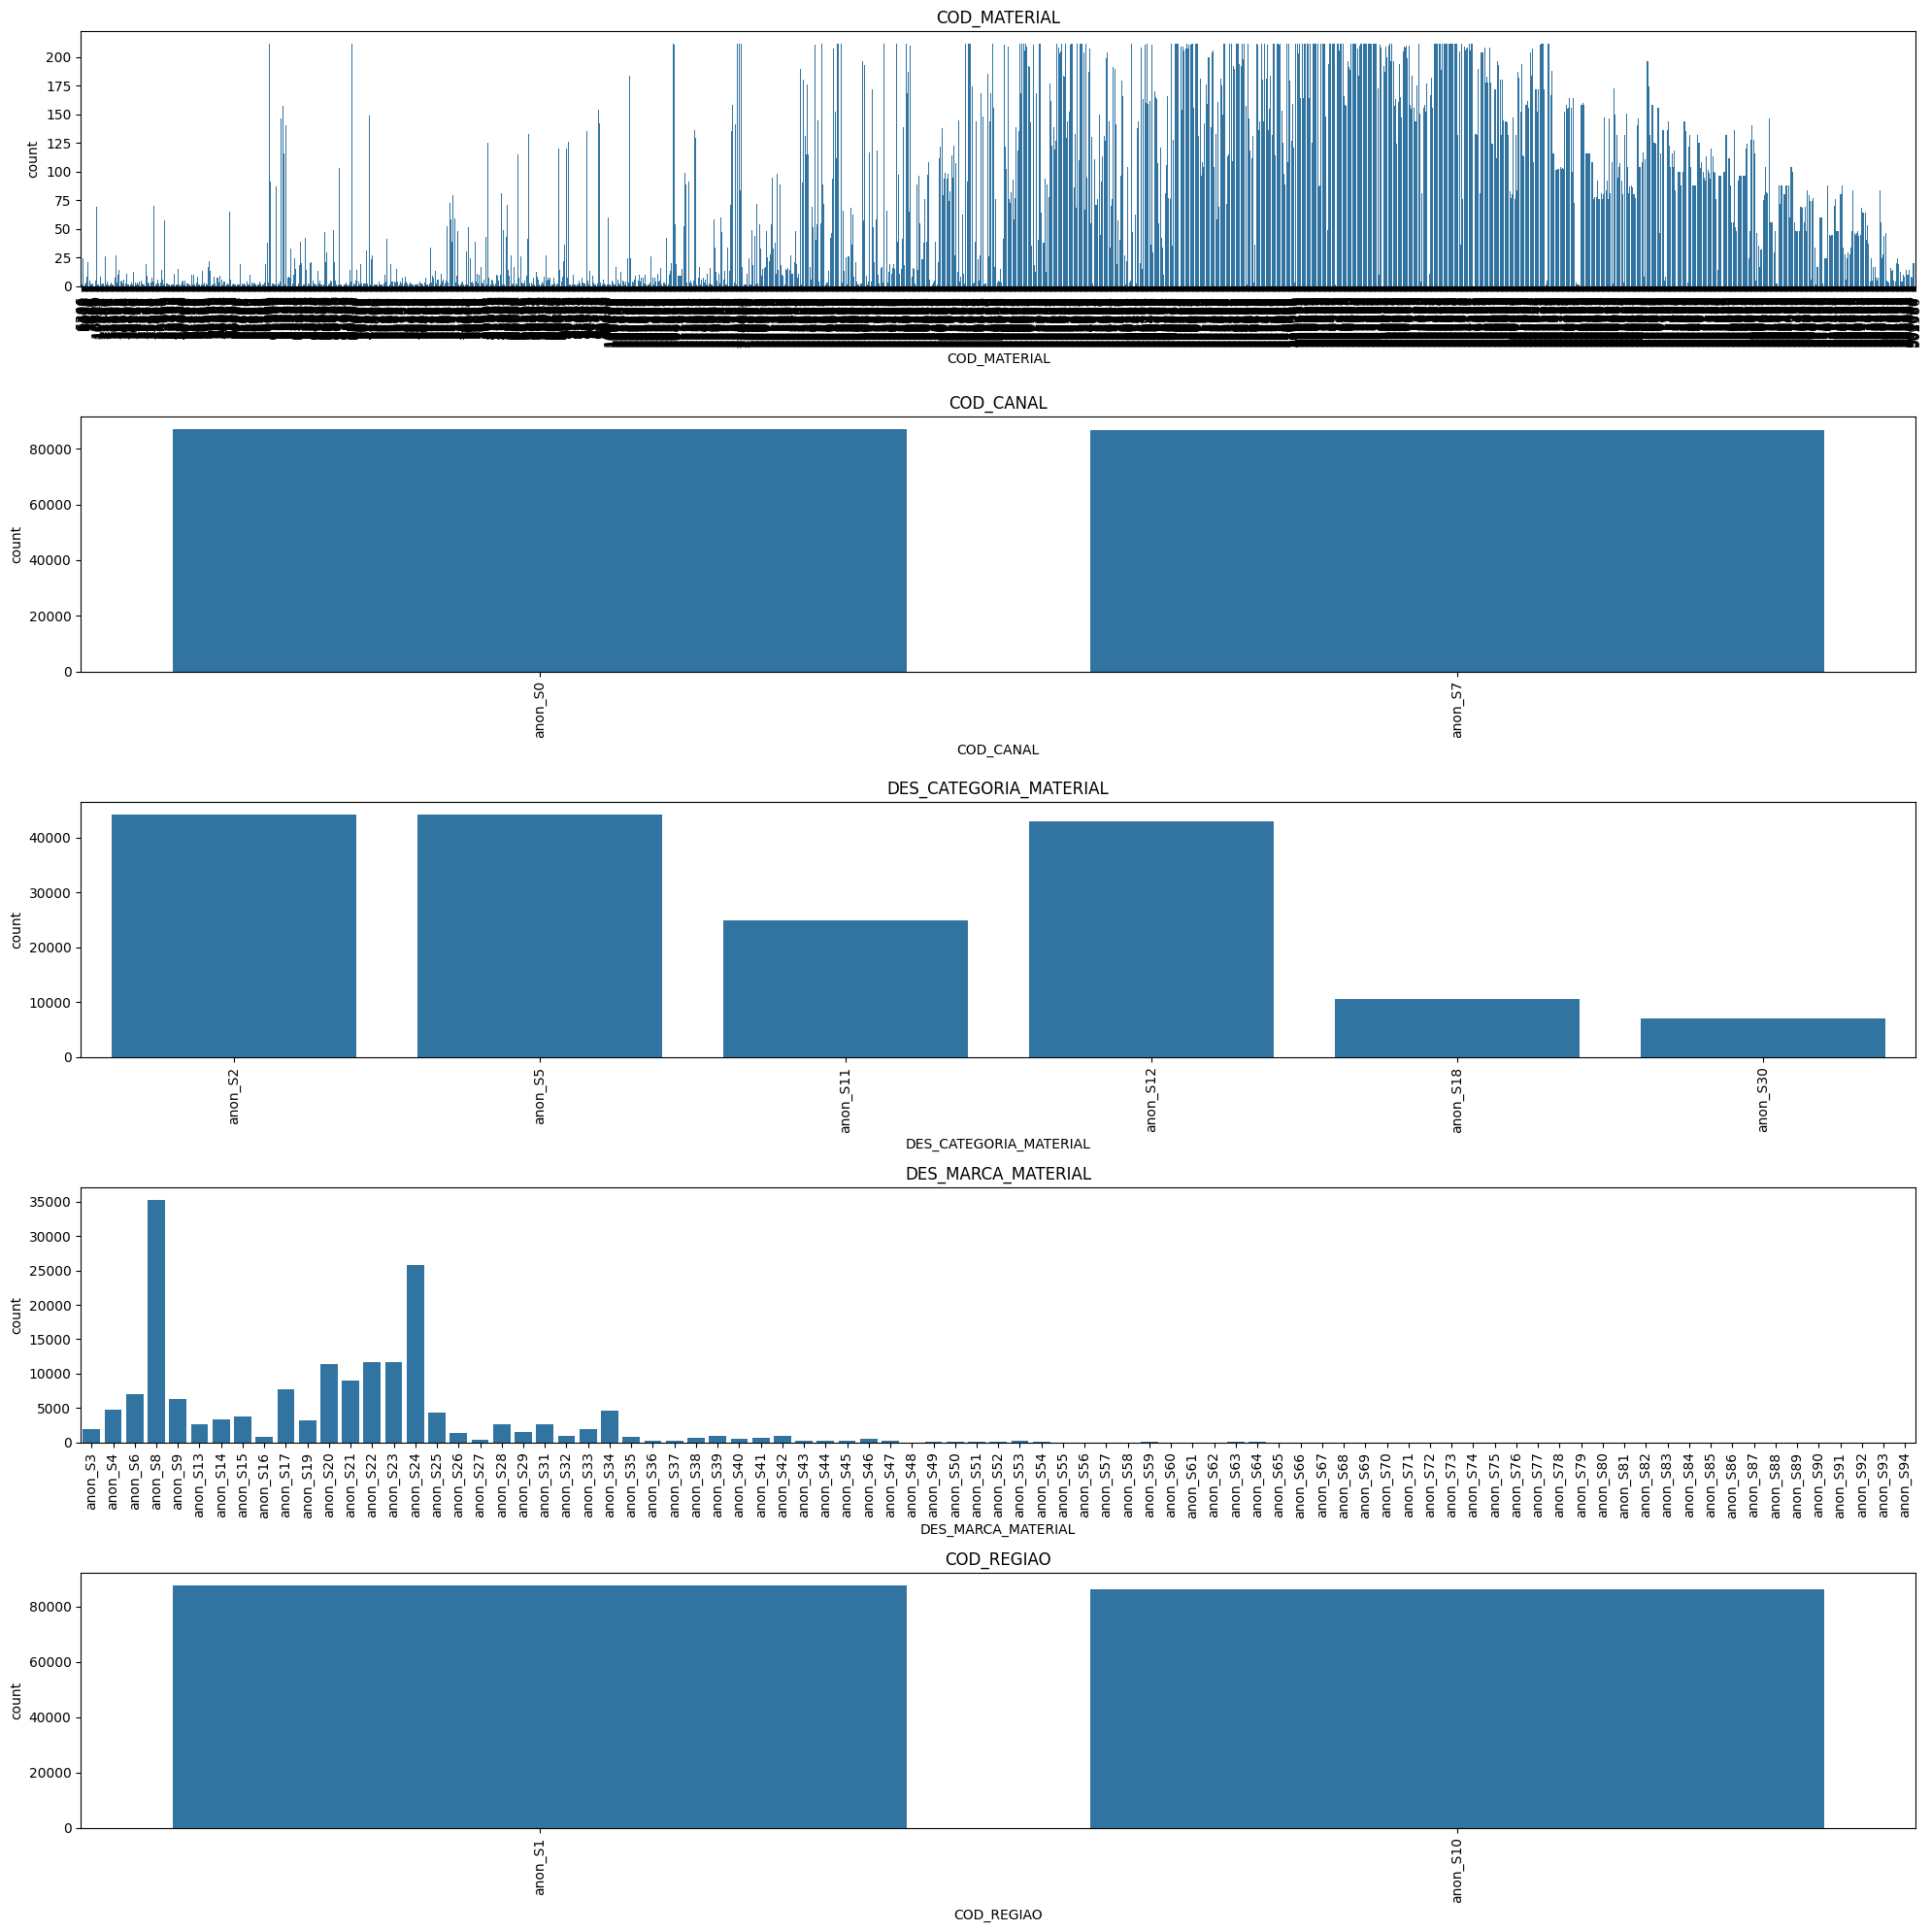

In [17]:
"""
Podemos observar que:
- Tem diversos COD_MATERIAL
- Os COD_CANAL tem um valor próximo para cada caso
- Os DES_CATEGORIA_MATERIAL tem predominância do anon_S2, anon_S5 e anon_S12
- Os DES_MARCA_MATERIAL tem predominância do anon_S8 e anon_S24
- Os COD_REGIAO tem um valor próximo para cada caso

"""

plot_histograms(lista_categoricas, 1)

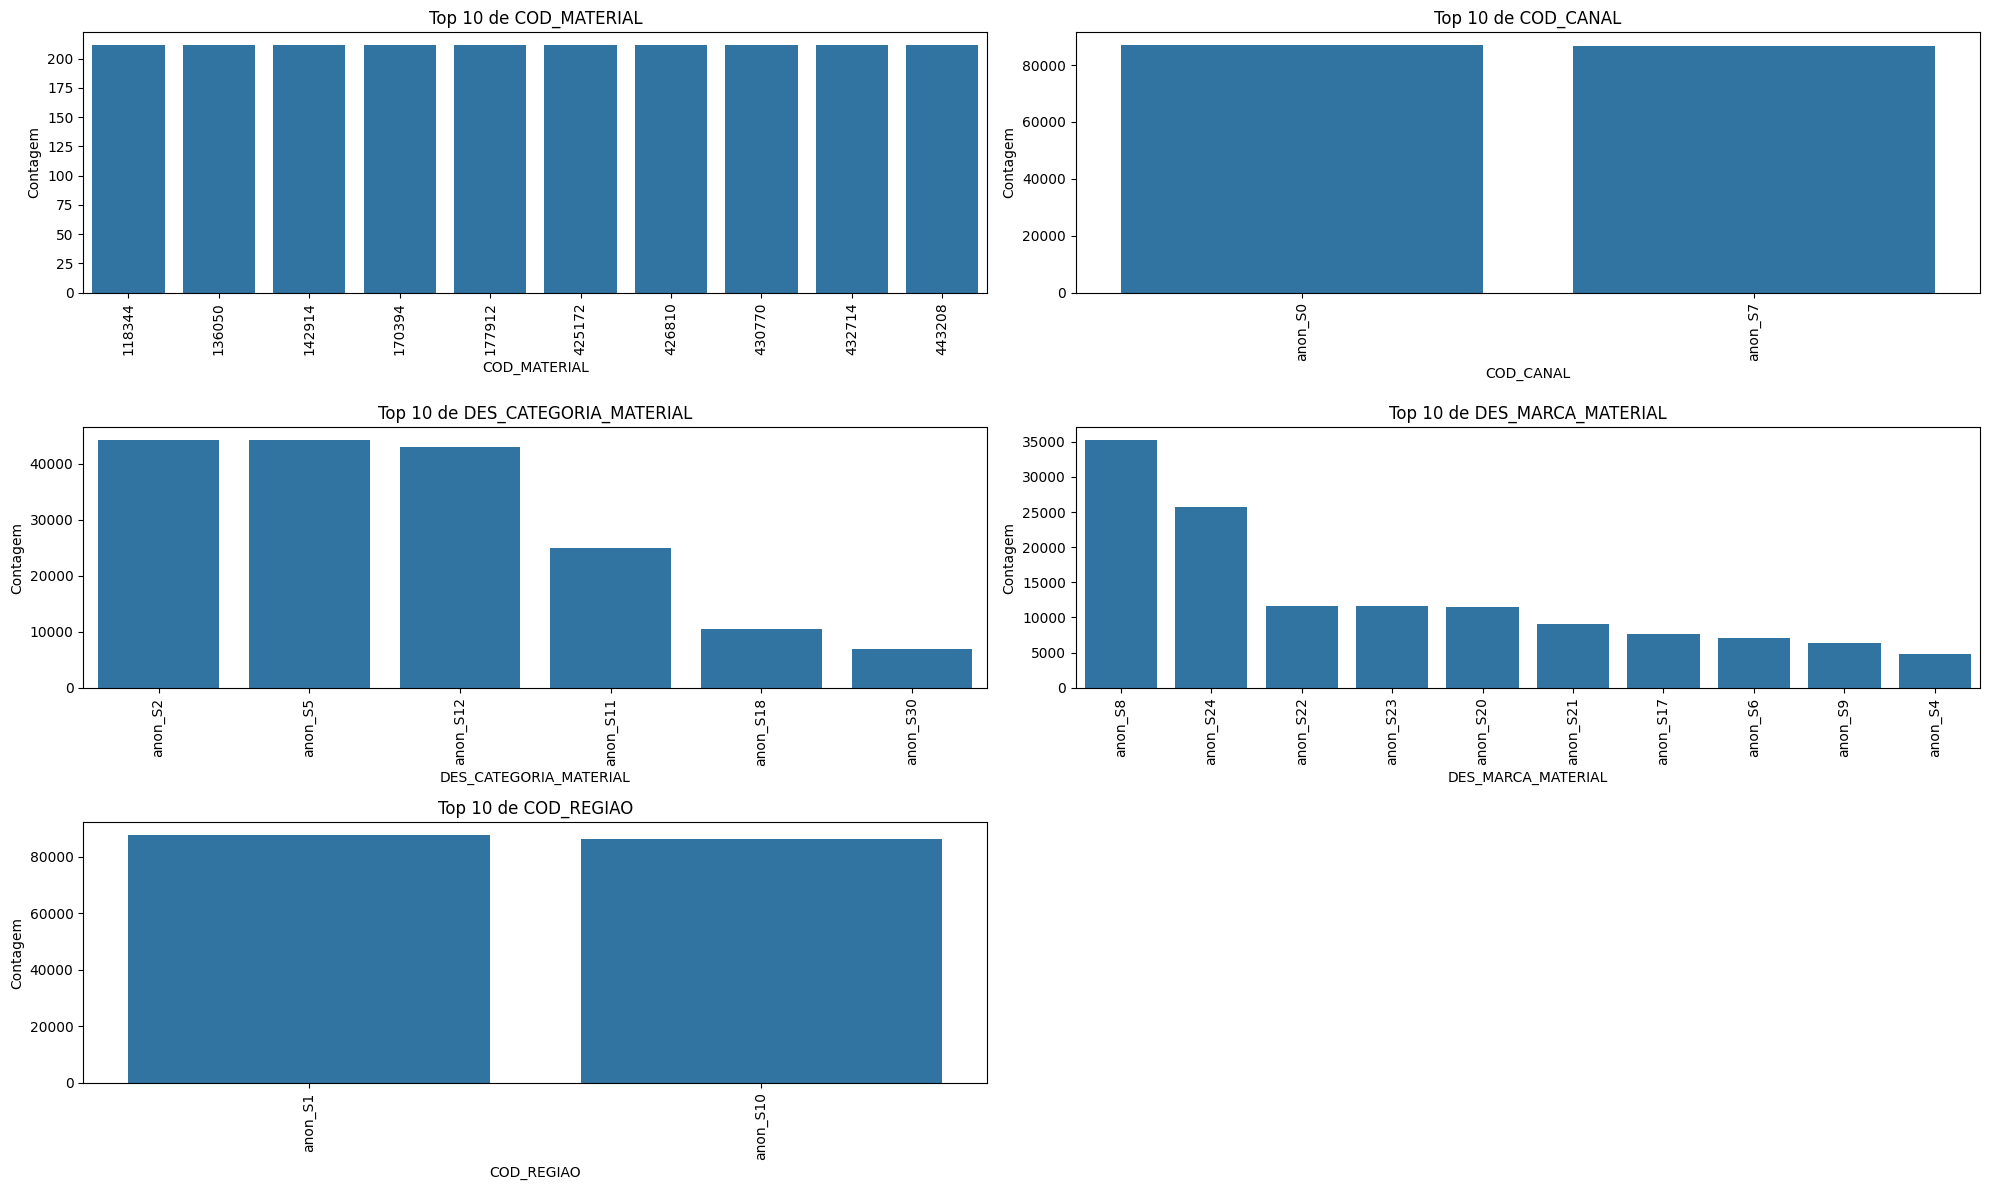

In [18]:
plot_histograms_frequentes(df, lista_categoricas, 2, 10)

### 4.2.2. Analisando  as colunas em pares

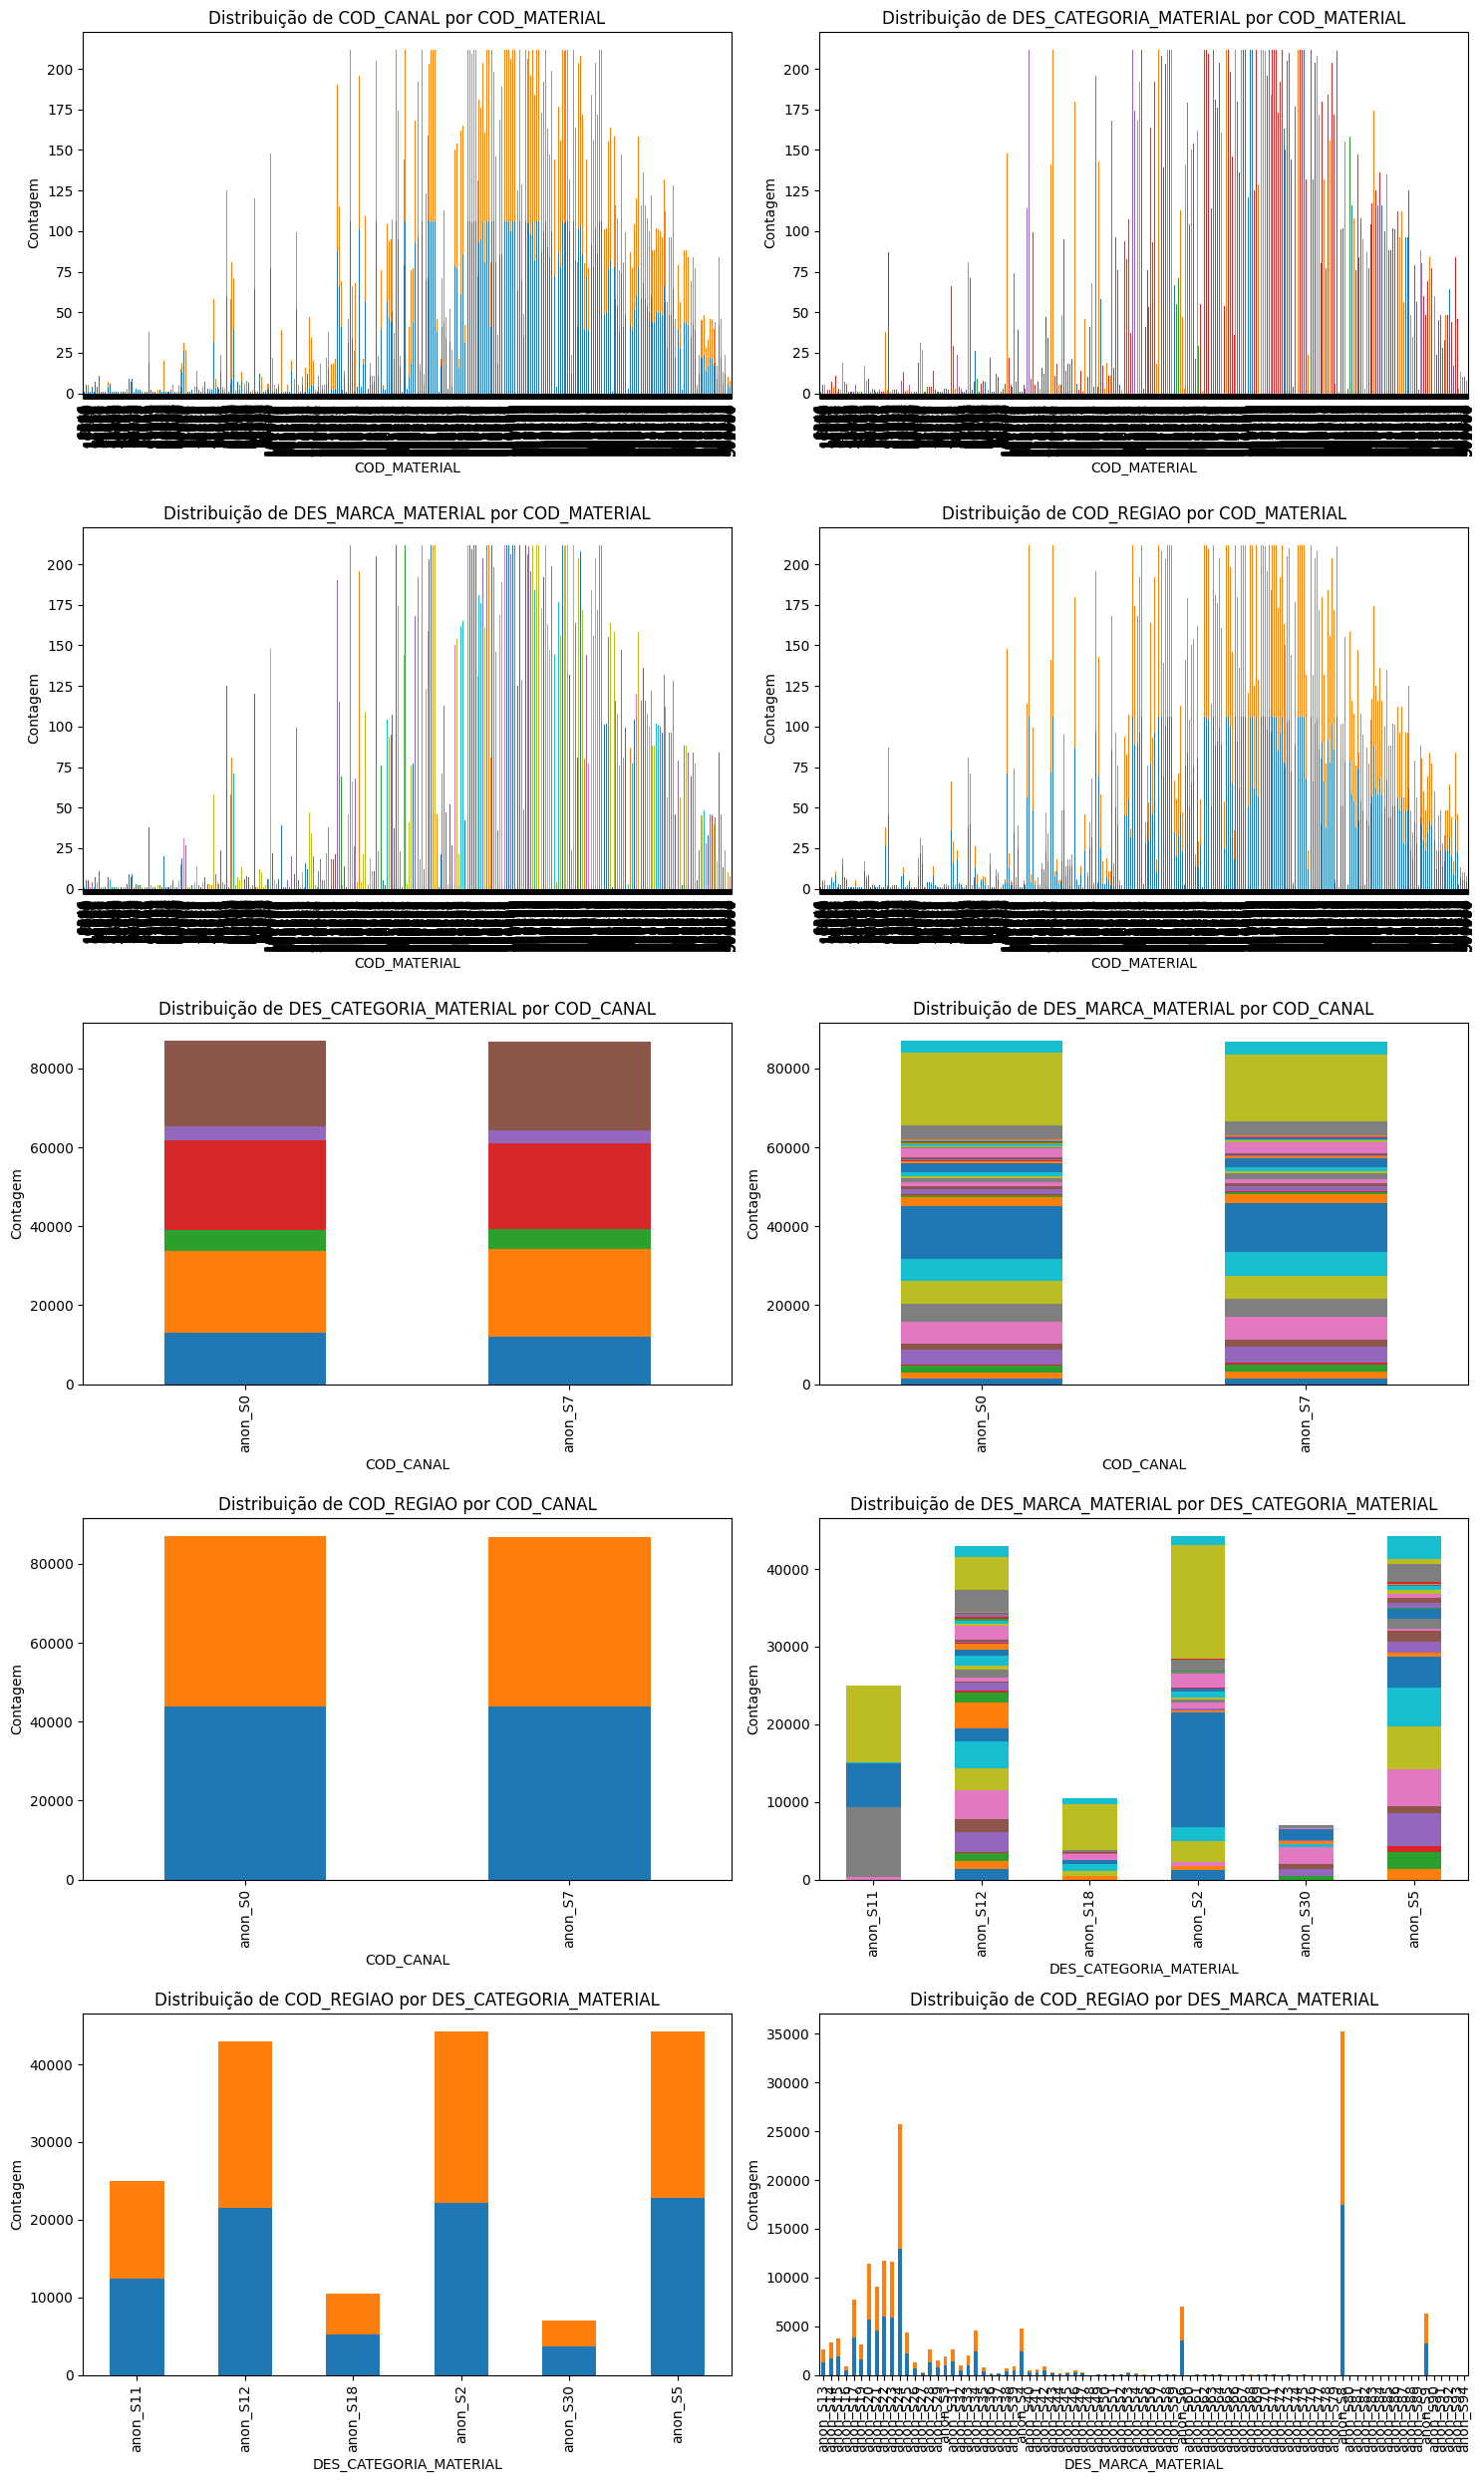

In [19]:
"""
Analisando de forma geral para cada par de dados observa-se que distribuição de:
- COD_CANAL em relação a COD_MATERIAL é praticamente constante a proporção entre eles
- DES_CATEGORIA_MATERIAL em relação a COD_MATERIAL é bem variada
- DES_MARCA_MATERIAL em relação a COD_MATERIAL é bem variada
- COD_REGIAO em relação a COD_MATERIAL é praticamente constante a proporção entre eles
- DES_CATEGORIA_MATERIAL em relação a COD_CANAL tem acentuação de alguns tipos
- DES_MARCA_MATERIAL em relação a COD_CANAL tem acentuação de um tipo sendo a proporção do restante praticamente constante (entre eles)
- COD_CANAL em relação a COD_REGIAO é praticamente constante a proporção entre eles
- DES_MARCA_MATERIAL em relação a DES_CATEGORIA_MATERIAL é variado com predominância de alguns tipos para a anon_s2, anon_s11 e anon_s18
- COD_REGIAO em relação a DES_CATEGORIA_MATERIAL é praticamente constante a proporção entre eles
- COD_REGIAO em relação a DES_MARCA_MATERIAL é praticamente constante a proporção entre eles
"""

plot_histograms_frequentes_pares(df, lista_categoricas, 2, 10000)

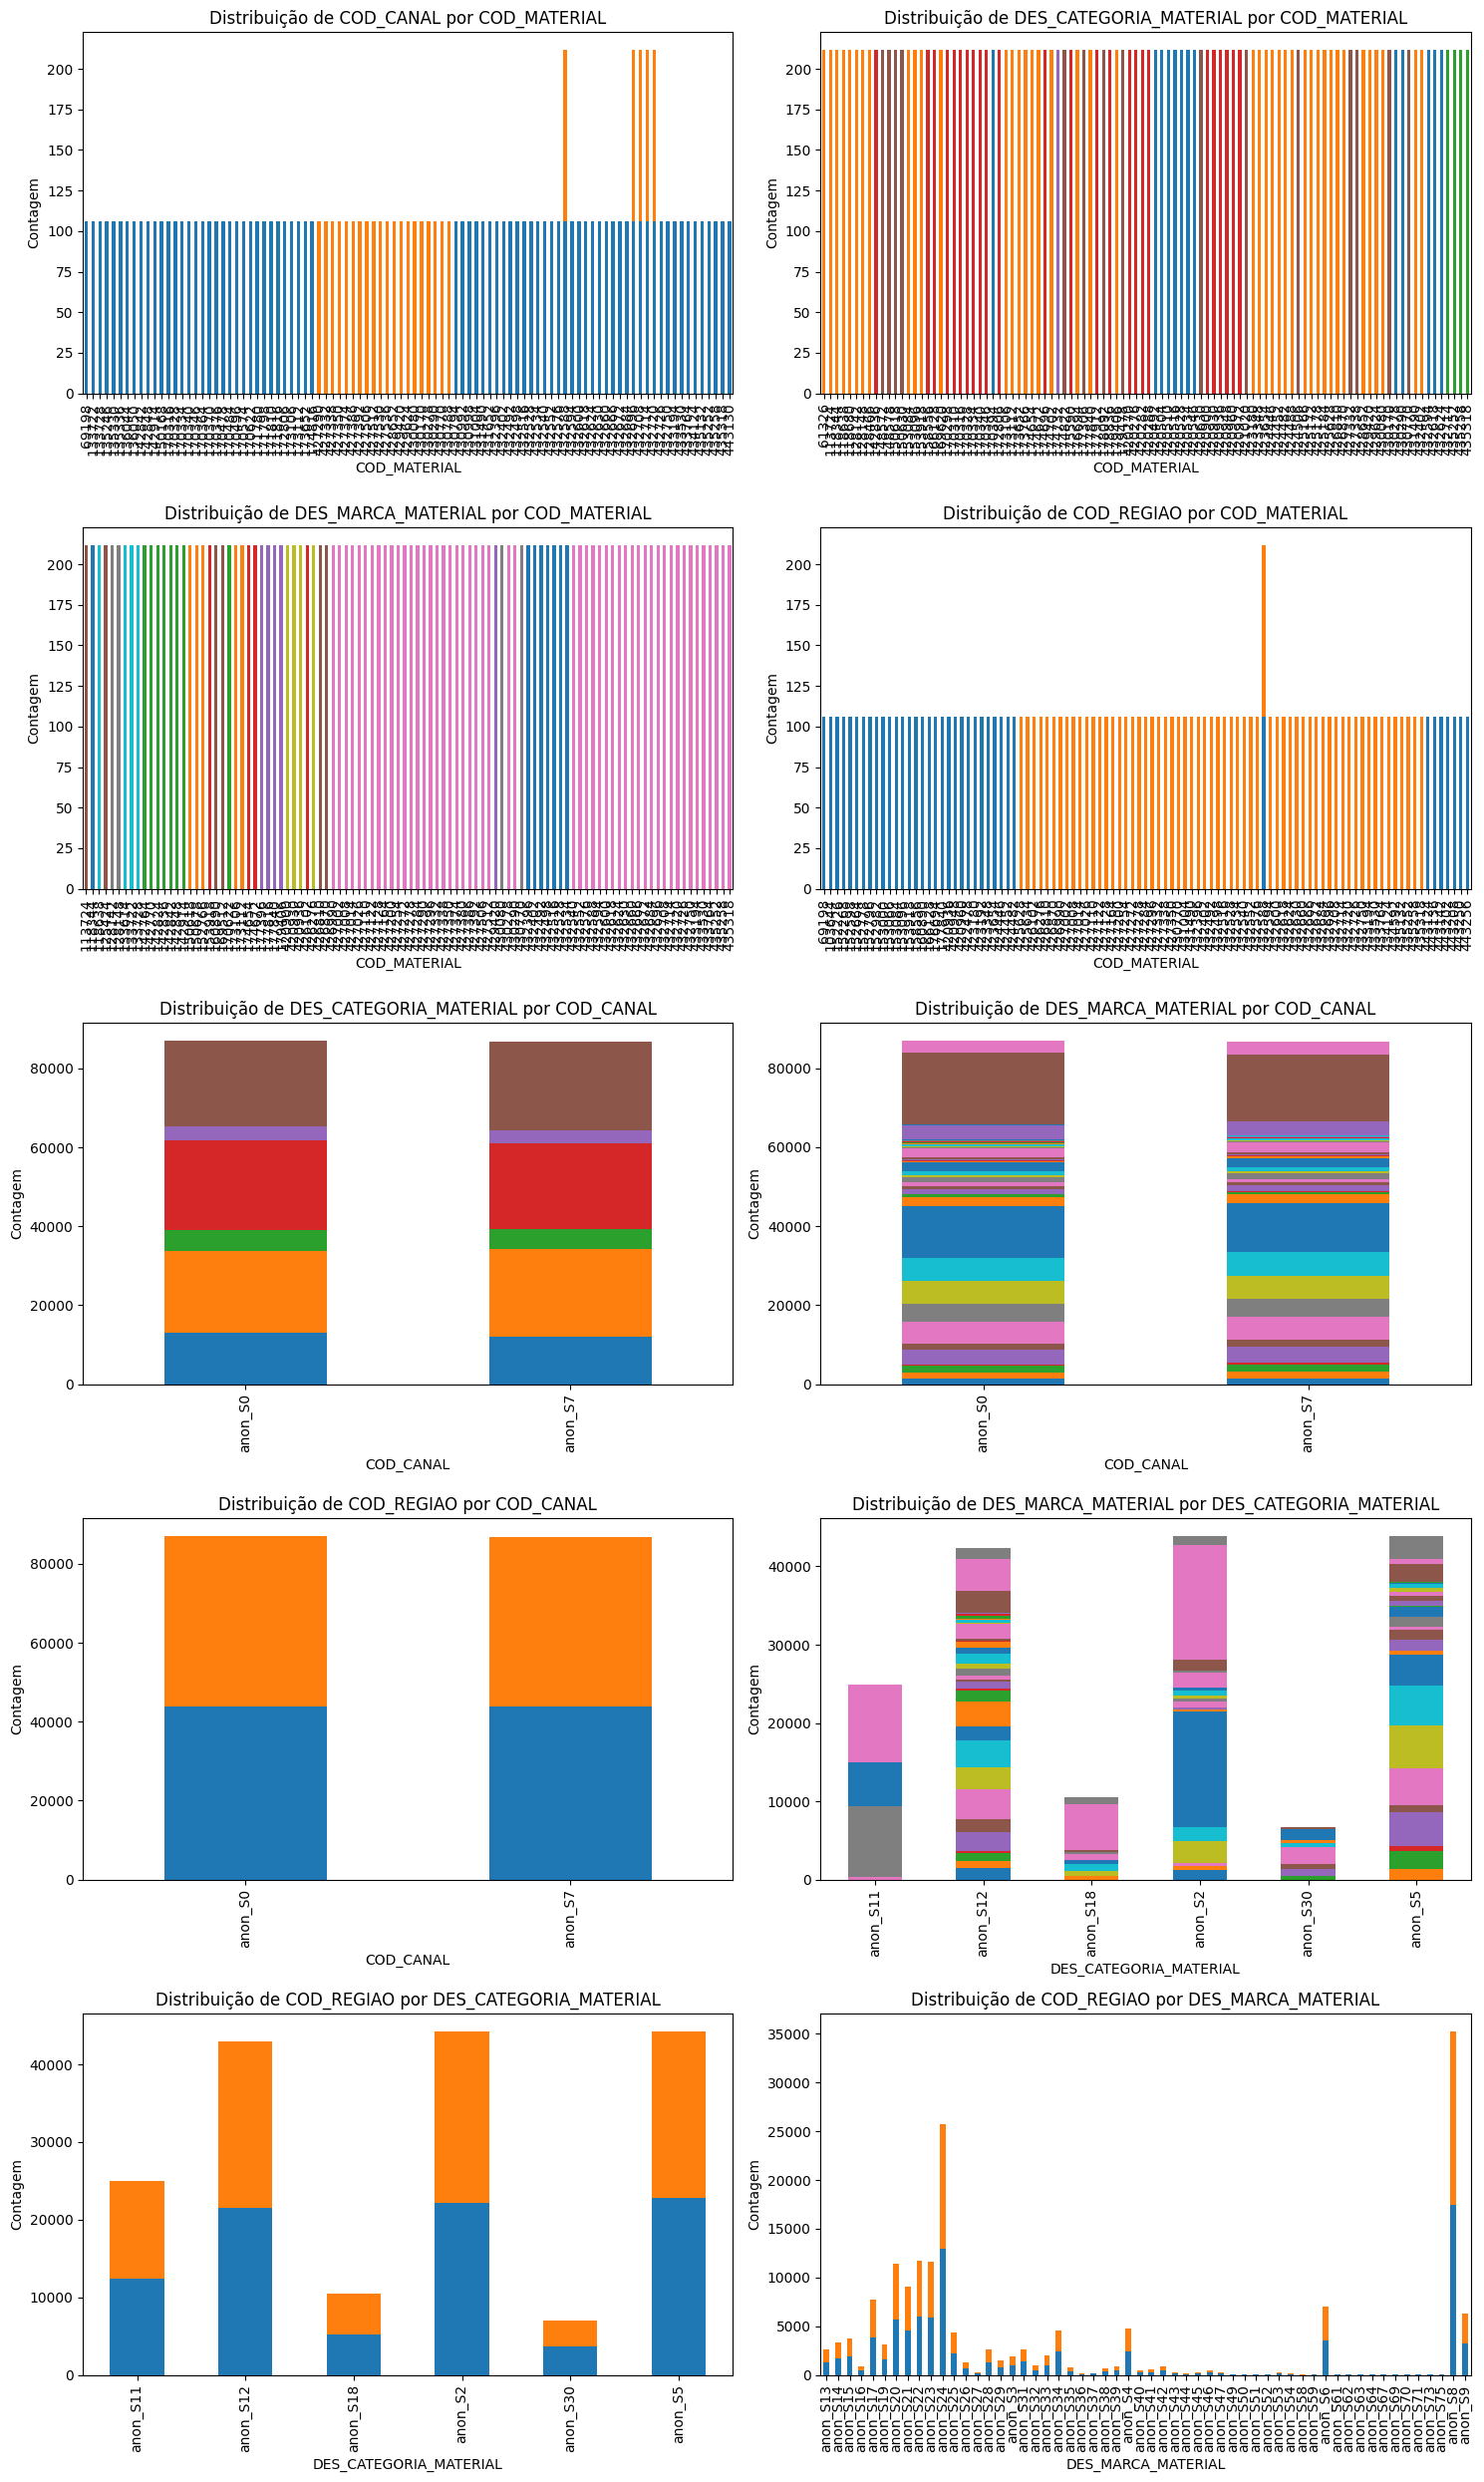

In [20]:
"""
Analisando os 100 valores mais frequentes para cada par de dados observa-se que distribuição de:
- COD_CANAL em relação a COD_MATERIAL é praticamente constante tendo alguns casos com maior quantidade
- DES_CATEGORIA_MATERIAL em relação a COD_MATERIAL é bem variada
- DES_MARCA_MATERIAL em relação a COD_MATERIAL é bem variada
- COD_REGIAO em relação a COD_MATERIAL é praticamente constante tendo alguns casos com maior quantidade
- DES_CATEGORIA_MATERIAL em relação a COD_CANAL é variada com predominancia dos tipos azul, laranja e verde
- DES_MARCA_MATERIAL em relação a COD_CANAL é variada com predominancia do tipo marrom, seguido do azul escuro e azul claro
- COD_REGIAO em relação a COD_CANAL é praticamente constante a proporção entre eles
- DES_MARCA_MATERIAL em relação a DES_CATEGORIA_MATERIAL é variado, sendo que no anon_s2 tem predominância do tipo rosa seguido do azul, no anon_s11 tem predominância do rosa, seguido do azule laranja e no anon anon_s18 tem predominância do rosa
- COD_REGIAO em relação a DES_CATEGORIA_MATERIAL é praticamente constante a proporção entre eles
- COD_REGIAO em relação a DES_MARCA_MATERIAL é praticamente constante a proporção entre eles
"""

plot_histograms_frequentes_pares(df, lista_categoricas, 2, 100)

## 4.3. Variáveis Contínuas

Podem assumir um número infinito de valores dentro de um intervalo e podem ser medidas em uma escala contínua


| **Feature**              | **Tipo Variável** | **Descrição**                                                |
|--------------------------|--------------------|-------------------------------------------------------------|
| QT_VENDA_BRUTO           | Continua           | Quantidade de itens vendidos                                |
| QT_DEVOLUCAO             | Continua           | Quantidade de itens devolvidos                              |
| VL_RECEITA_BRUTA         | Continua           | Valor da receita bruta                                      |
| VL_RECEITA_LIQUIDA       | Continua           | Valor da receita líquida                                    |
| PCT_DESCONTO             | Continua           | Percentual de desconto feito por Marketing                  |
| VL_PRECO                 | Continua           | Valor do preço do Produto                                   |


In [21]:
# Ajustando de objeto para float
for i in df.columns:
    if i in lista_continua and df[i].dtype != 'float64':
        df[i] = df[i].apply(lambda x: float(x.replace(',', '.')) if pd.notna(x) else x)

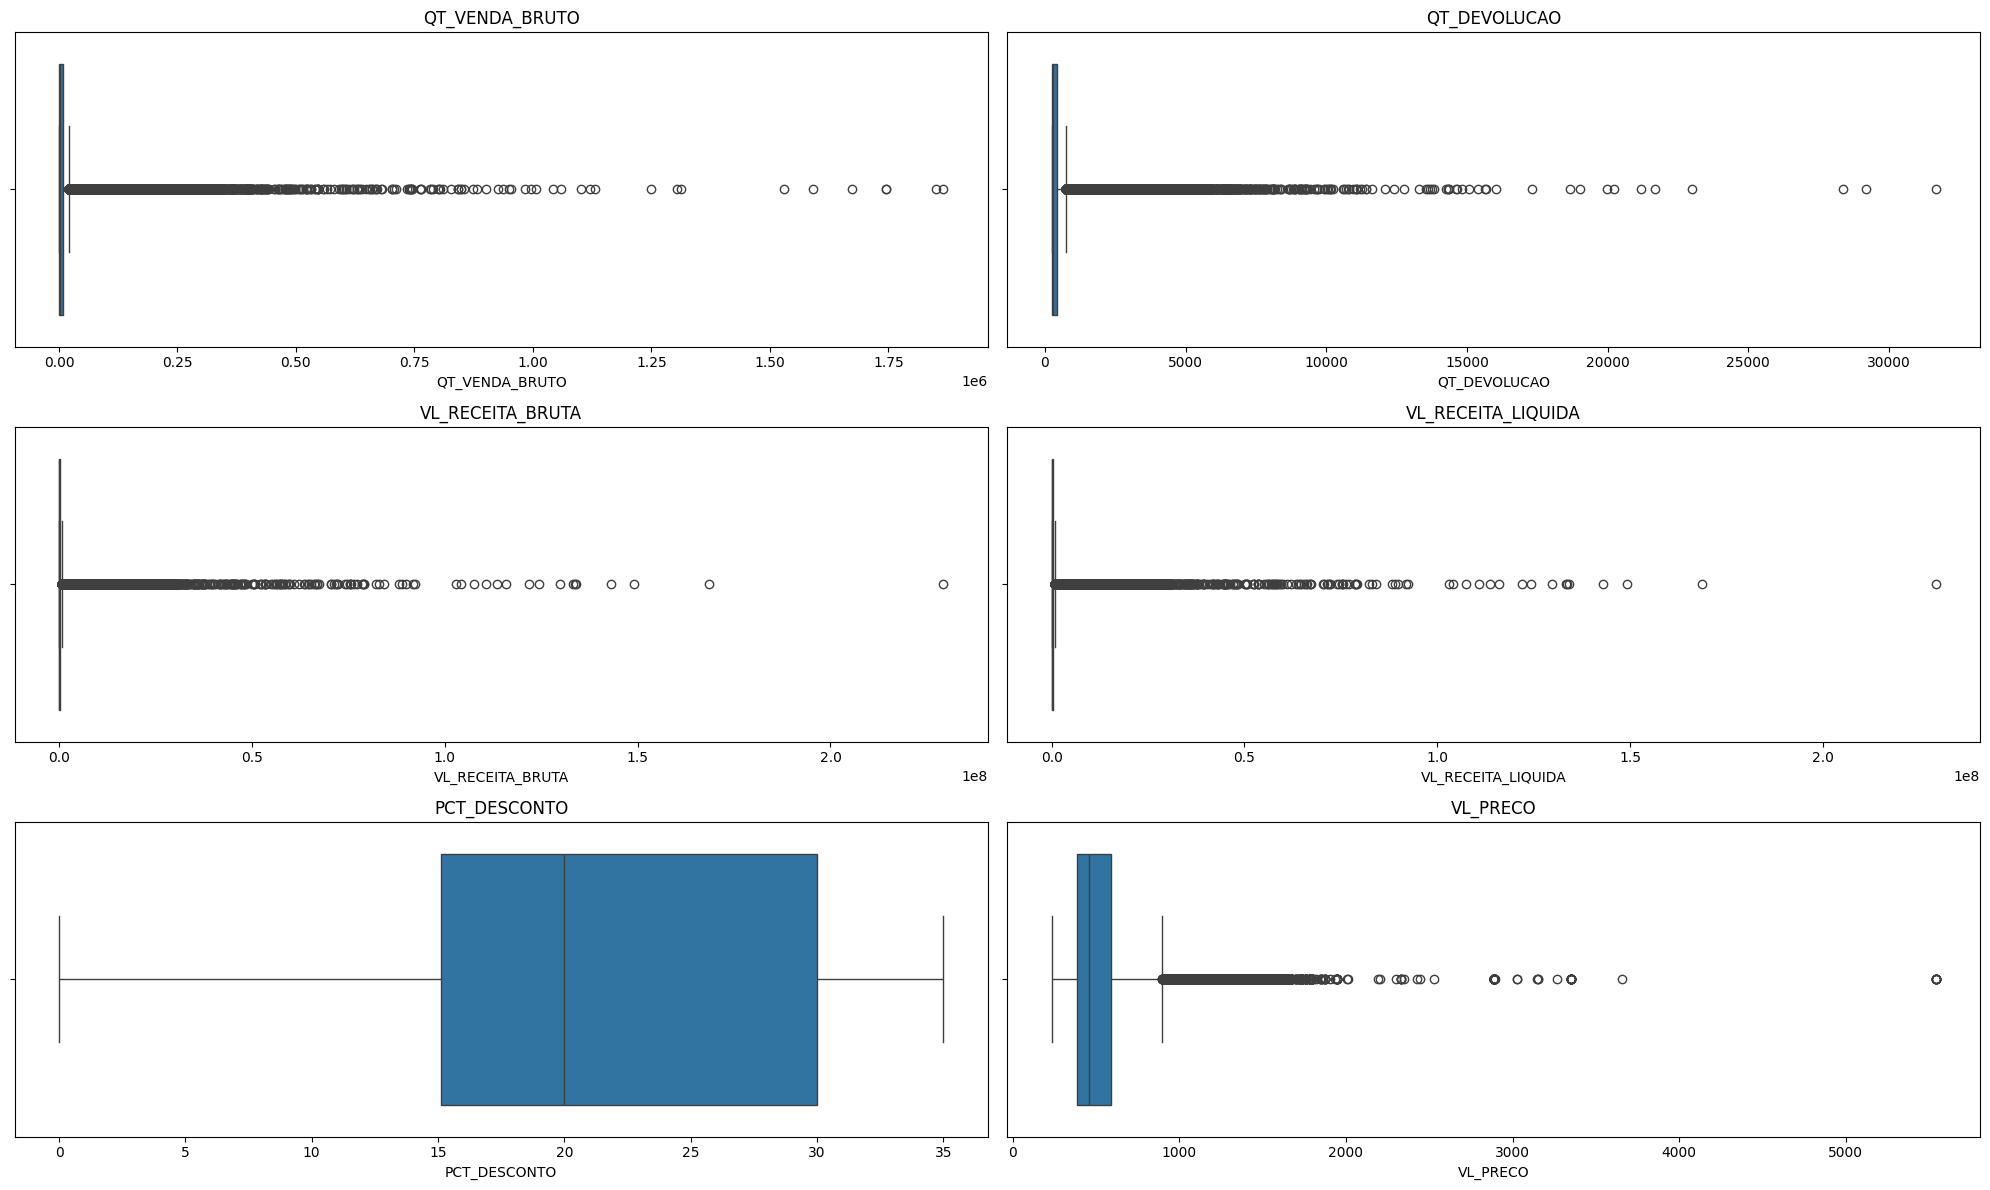

In [22]:
"""
Verifica-se que há outliers nos dados, sendo que o único parâmetro que se mantém dentro das médias é o PCT_DESCONTO,
no entanto, por serem informações sobre preço e receita não serão retirados da análise
"""
plot_boxplots(df, lista_continua, 2)

## 4.3. Variáveis Ordinais

Têm uma ordem ou hierarquia natural entre os valores, mas as diferenças entre os valores não são necessariamente iguais ou mensuráveis.

| **Feature**              | **Tipo Variável** | **Descrição**                                                |
|--------------------------|--------------------|-------------------------------------------------------------|
| COD_CICLO                | Ordinal            | Indicação de período definido por marketing                 |



In [23]:
"""
Os valores do COD_CICLO inicia com o ano seguido de um número com dois valores, como é maior que 12 
então não é o mês, sendo assim considerei como sendo a semana do ano
"""

df['COD_CICLO'].unique()

array([201917, 202005, 201901, 201813, 202006, 202017, 201814, 202007,
       201804, 201818, 201802, 201806, 202010, 201913, 201812, 201809,
       202004, 201805, 201910, 201807, 202011, 202015, 201912, 202003,
       201903, 202009, 201904, 201911, 201801, 201914, 202012, 202014,
       201909, 202013, 201916, 201907, 201803, 202008, 201902, 201905,
       202002, 201810, 201815, 201816, 201808, 201817, 202016, 202101,
       201908, 201906, 201811, 202001, 201915], dtype=int64)

In [24]:
# Ajustando os valores da coluna para que seja datetime
df['COD_CICLO'] = df['COD_CICLO'].apply(week_to_date)

df['COD_CICLO'].unique()

<DatetimeArray>
['2019-04-29 00:00:00', '2020-02-03 00:00:00', '2019-01-07 00:00:00',
 '2018-04-02 00:00:00', '2020-02-10 00:00:00', '2020-04-27 00:00:00',
 '2018-04-09 00:00:00', '2020-02-17 00:00:00', '2018-01-29 00:00:00',
 '2018-05-07 00:00:00', '2018-01-15 00:00:00', '2018-02-12 00:00:00',
 '2020-03-09 00:00:00', '2019-04-01 00:00:00', '2018-03-26 00:00:00',
 '2018-03-05 00:00:00', '2020-01-27 00:00:00', '2018-02-05 00:00:00',
 '2019-03-11 00:00:00', '2018-02-19 00:00:00', '2020-03-16 00:00:00',
 '2020-04-13 00:00:00', '2019-03-25 00:00:00', '2020-01-20 00:00:00',
 '2019-01-21 00:00:00', '2020-03-02 00:00:00', '2019-01-28 00:00:00',
 '2019-03-18 00:00:00', '2018-01-08 00:00:00', '2019-04-08 00:00:00',
 '2020-03-23 00:00:00', '2020-04-06 00:00:00', '2019-03-04 00:00:00',
 '2020-03-30 00:00:00', '2019-04-22 00:00:00', '2019-02-18 00:00:00',
 '2018-01-22 00:00:00', '2020-02-24 00:00:00', '2019-01-14 00:00:00',
 '2019-02-04 00:00:00', '2020-01-13 00:00:00', '2018-03-12 00:00:00',
 '20

# 5. Análise das Variáveis

## 5.1. Visão Geral

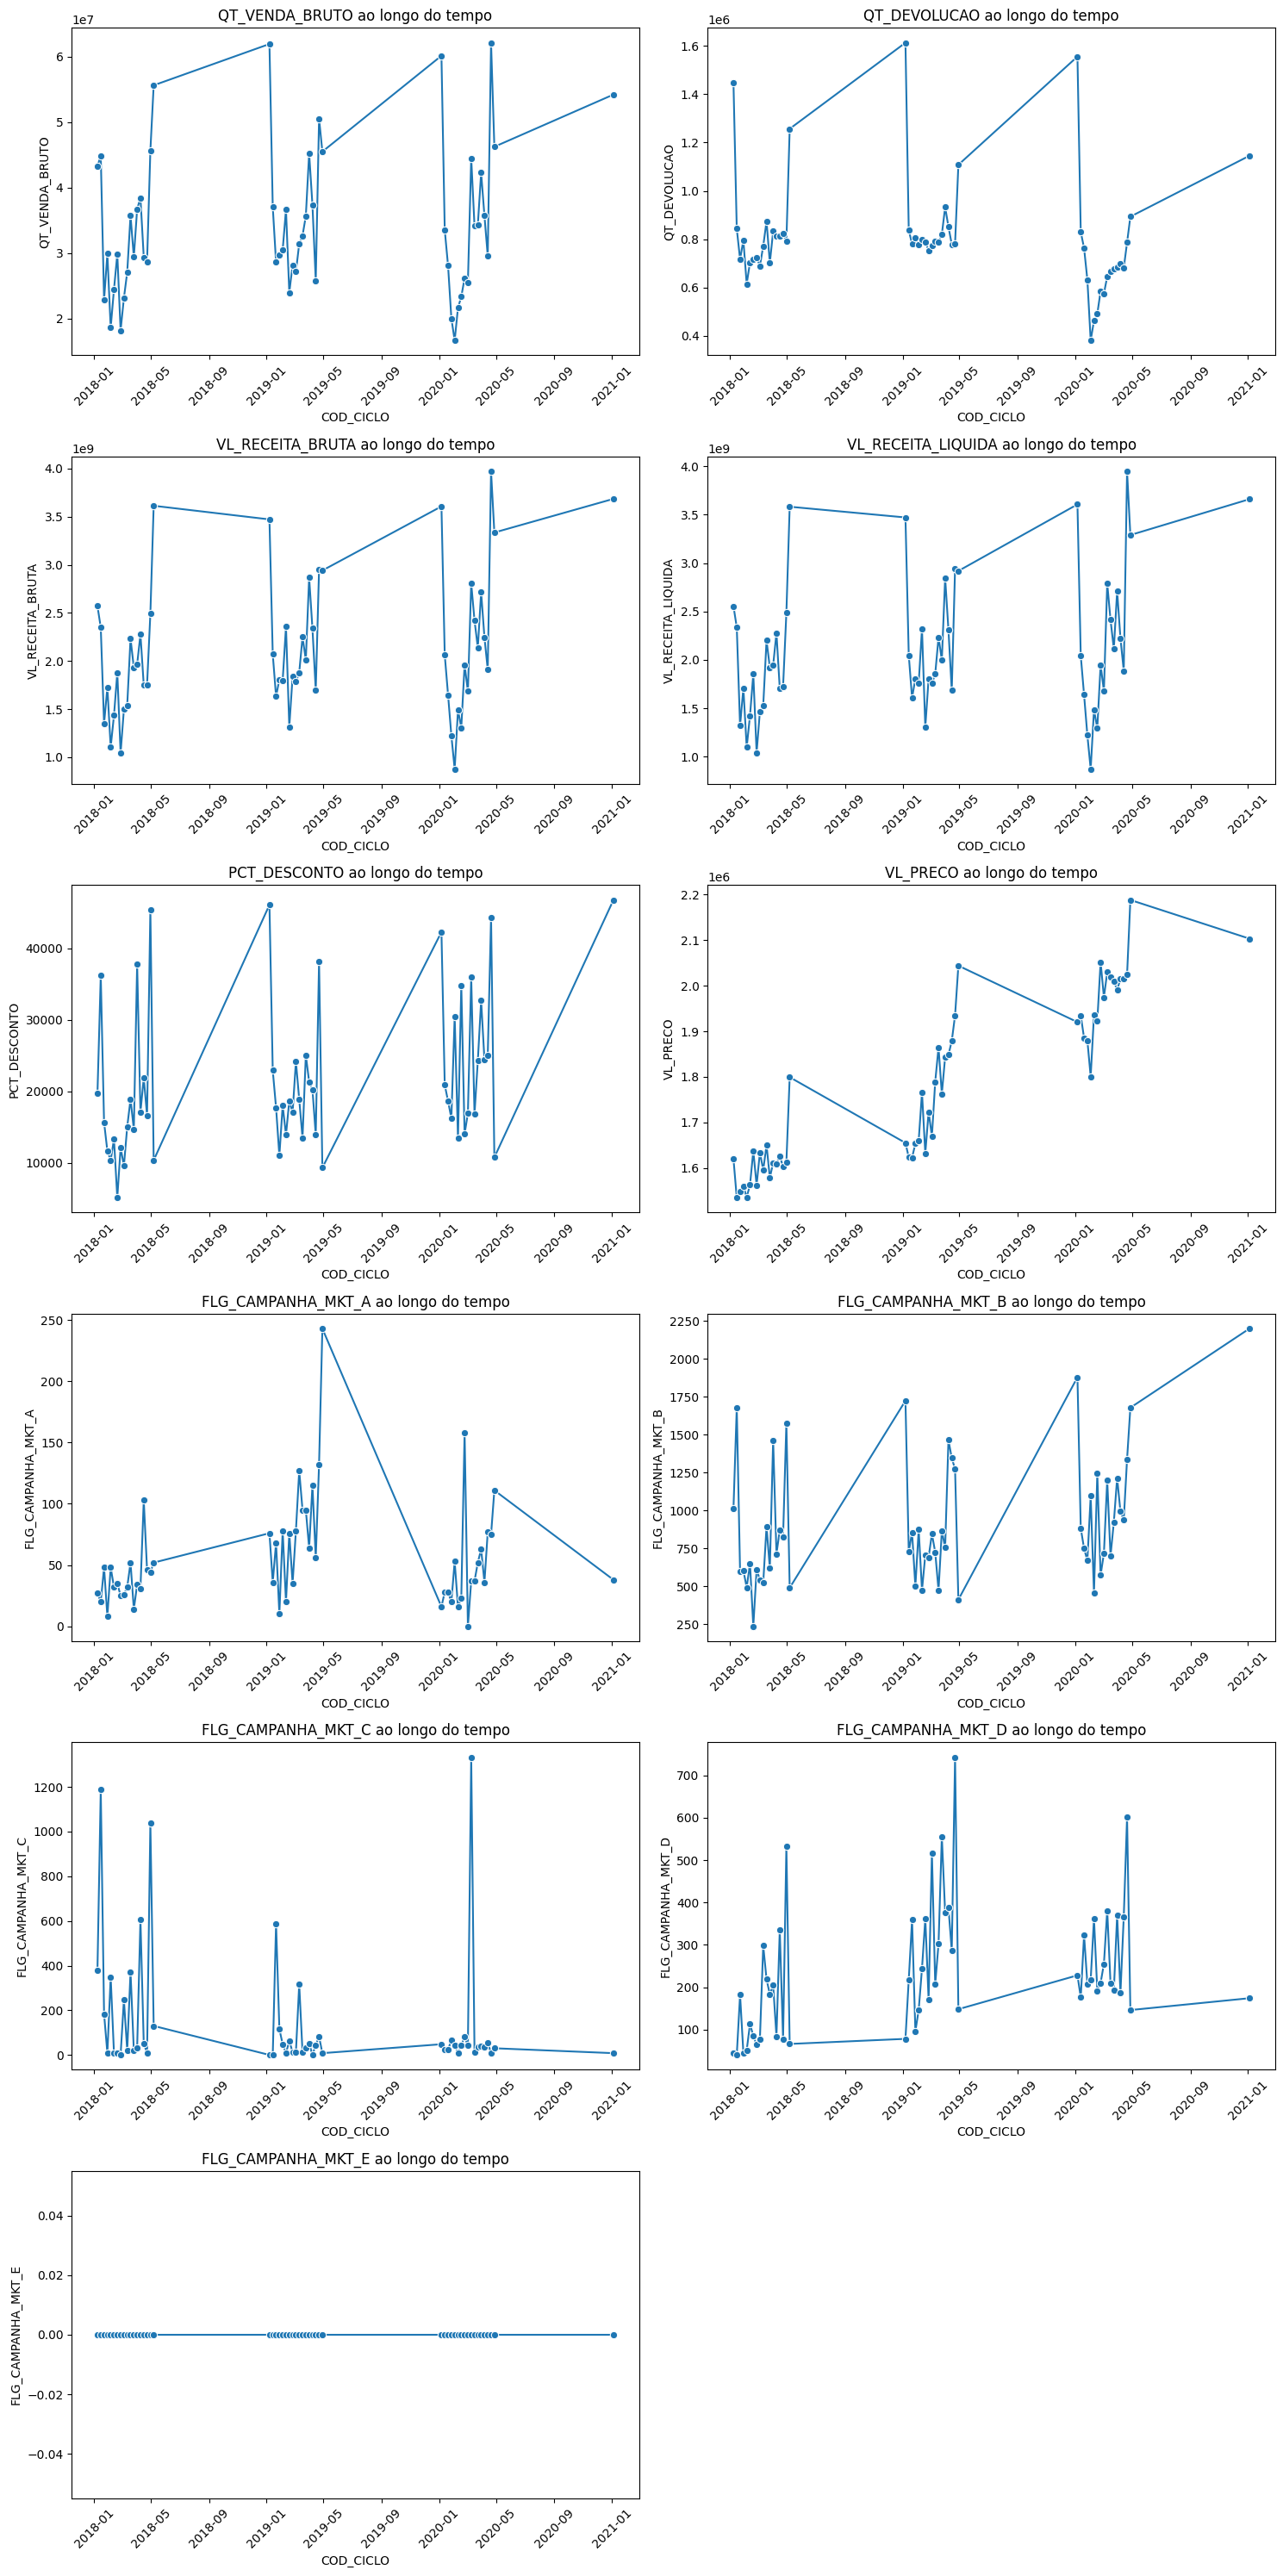

In [25]:
"""
Podemos observar que o aumento na quantidade de vendas está relacionado com o aumento na quantidade de devolução
Mesmo tendo aumento na devolução a receita bruta e líquida é pouco afetada
Aparentemente o pacote de desconto auxiliou na QT_VENDA_BRUTO
Mesmo aumento o VL_PRECO ao longo do tempo não refletiu no aumento da VL_RECEITA_BRUTA E VL_RECEITA_LIQUIDA
A Coluna de FLG_DATA_COMEMORATIVA esta no descritivo mas não está no dataset
Comparando as QT_VENDA_BRUTO e as campanhas de Marketing, aparentemente a Campanha do MKT mais efetiva para o aumento do QT_VENDA_BRUTO foi a Campanha_MKT_B
A Campanha_MKT_E não foi executada nesse período
"""

plot_lineplots_categoria_frequentes(df, lista_continua + lista_ordinal + lista_flag, 'COD_CICLO', 10000)


## 5.2. Análise das datas de Execução das Campanhas de Marketing

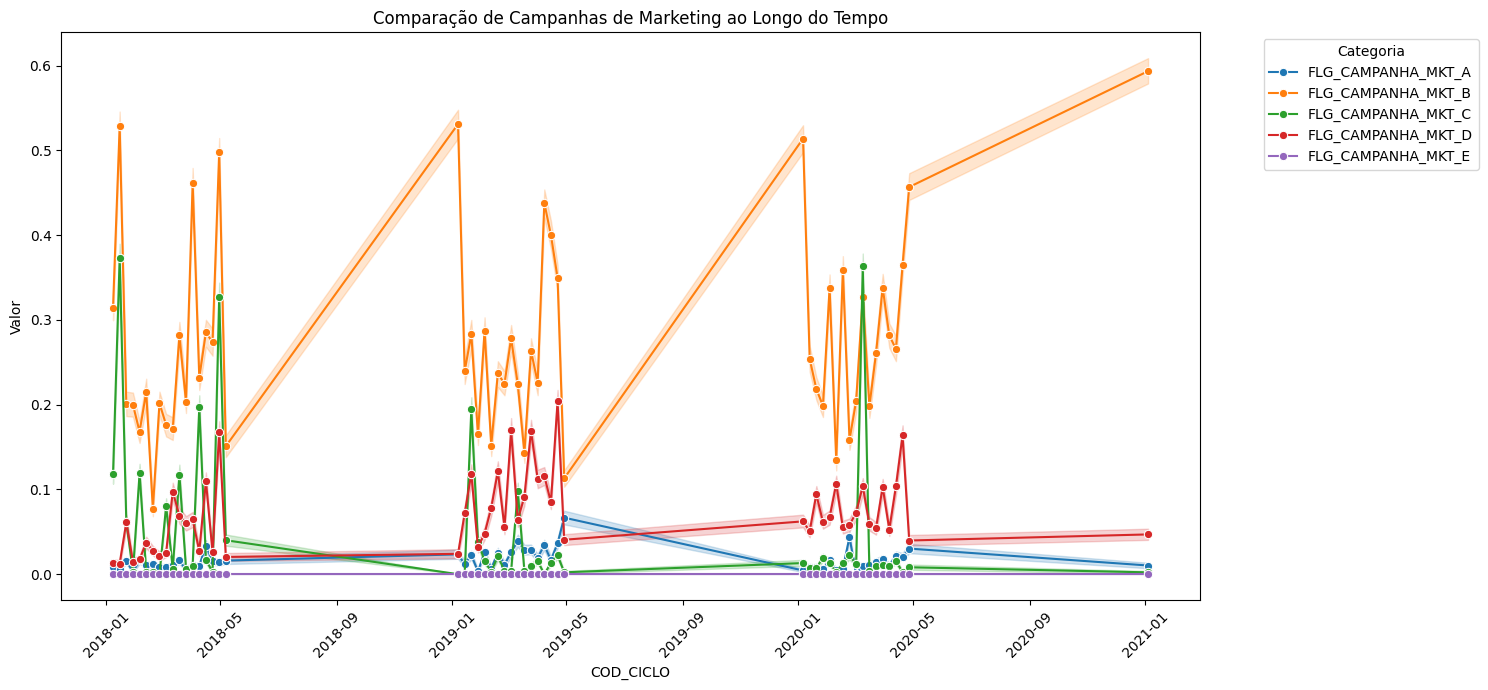

In [26]:
"""
Verificado que:
- a campanha de Marketing B durou mais tempo, reduzindo no primeiro semestre e intensificando no segundo semestre de cada ano
- as demais campanhas foram executadas no primeiro semestre de cada ano
- a campanha de Marketing C teve alguns picos
- a campanha de Marketing D está se intensificando ao longo do tempo mostrando uma linha de tendência de alta
- a campanha de Marketing A foi executada em alguns períodos mas parece que não foi efetiva
- a campanha de Marketing E não foi executada nesse período

"""
plot_multiple_lineplots(df, lista_flag, 'COD_CICLO', 'Campanhas de Marketing')

## 5.2.  Análise da relação entre vendas e receita ao longo do tempo

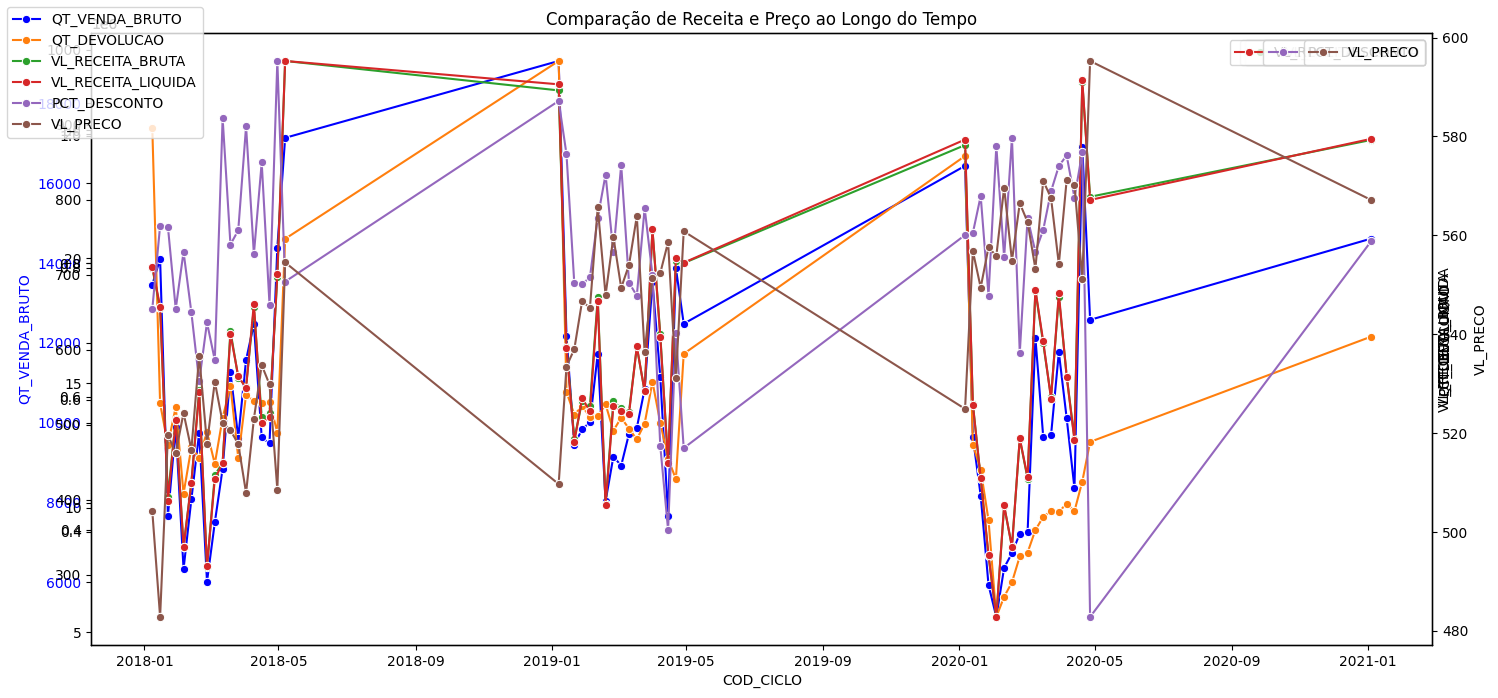

In [27]:
"""
Comparando as características do preço ao longo do tempo em escala diferente para poder analisar a tendência pode-se observar que:
- as variações acontecem no segundo semestre, iniciando em maio e terminando em Janeiro
- há um aumento de vendas (QT_VENDA_BRUTO) ao longo do tempo no segundo semestre de cada ano
- há um aumento de devoluções (QT_DEVOLUCAO) ao longo do tempo no segundo semestre de cada ano
- há um aumento de descontos (PCT_DESCONTO) ao longo do tempo no segundo semestre de cada ano
- há diminuição de receita (VL_RECEITA_BRUTA E VL_RECEITA_LIQUIDA) ao longo do tempo no segundo semestre do primeiro ano
- há aumento de receita (VL_RECEITA_BRUTA E VL_RECEITA_LIQUIDA) ao longo do tempo no segundo semestre dos anos de 2019 e 2020
- há diminuição de preço (VL_PRECO) ao longo do tempo no segundo semestre de cada ano

"""


plot_with_multiple_scales_seaborn(df, lista_continua, 'COD_CICLO', 'Receita e Preço')

## 5.3.  Análise da influência das Campanhas de Marketing em relação as vendas ao longo do tempo

In [28]:
lista_flag_ajustado = ['FLG_CAMPANHA_MKT_A', 'FLG_CAMPANHA_MKT_B', 'FLG_CAMPANHA_MKT_C', 'FLG_CAMPANHA_MKT_D']

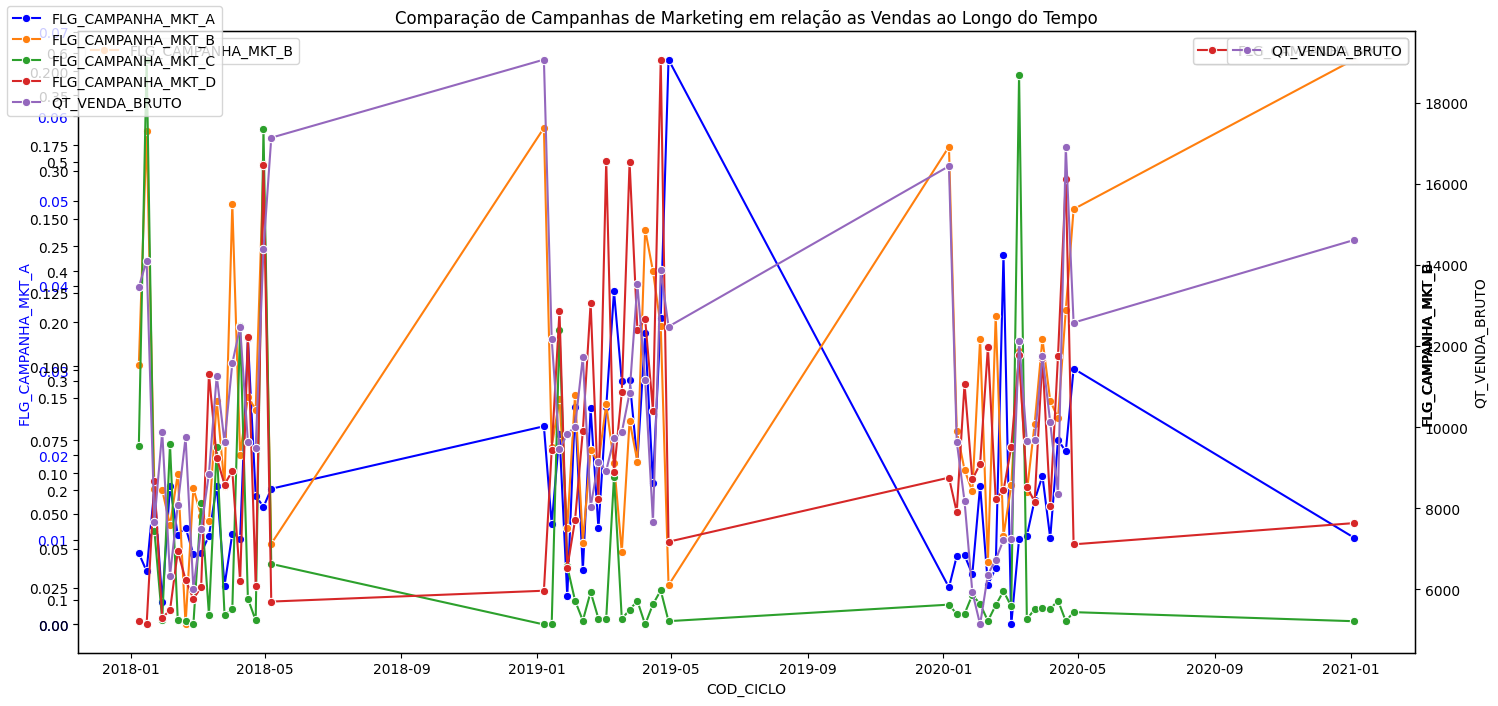

In [29]:
"""
Como a CAMPANHA_MKT_E não foi executada nesse período foi desconsiderada da análise

Analisando os gráficos podemos observar que:
- A campanha de Marketing A teve influência sobre as vendas, pois ao diminuir interfere no aumento da QT_VENDA_BRUTO
- A campanha de Marketing B não teve tanta influência sobre as vendas, pois mesmo aumentando diminuiu a QT_VENDA_BRUTO
- A campanha de Marketing C não teve influência sobre as vendas, pois teve um valor próximo de zero
- A campanha de Marketing D teve influência sobre as vendas, pois ao crescer interferiu no aumento da QT_VENDA_BRUTO

"""

plot_with_multiple_scales_seaborn(df, lista_flag_ajustado + ['QT_VENDA_BRUTO'], 'COD_CICLO', 'Campanhas de Marketing em relação as Vendas')

## 5.4.  Análise do Canal e Região em relação a Receita e Vendas ao longo do tempo

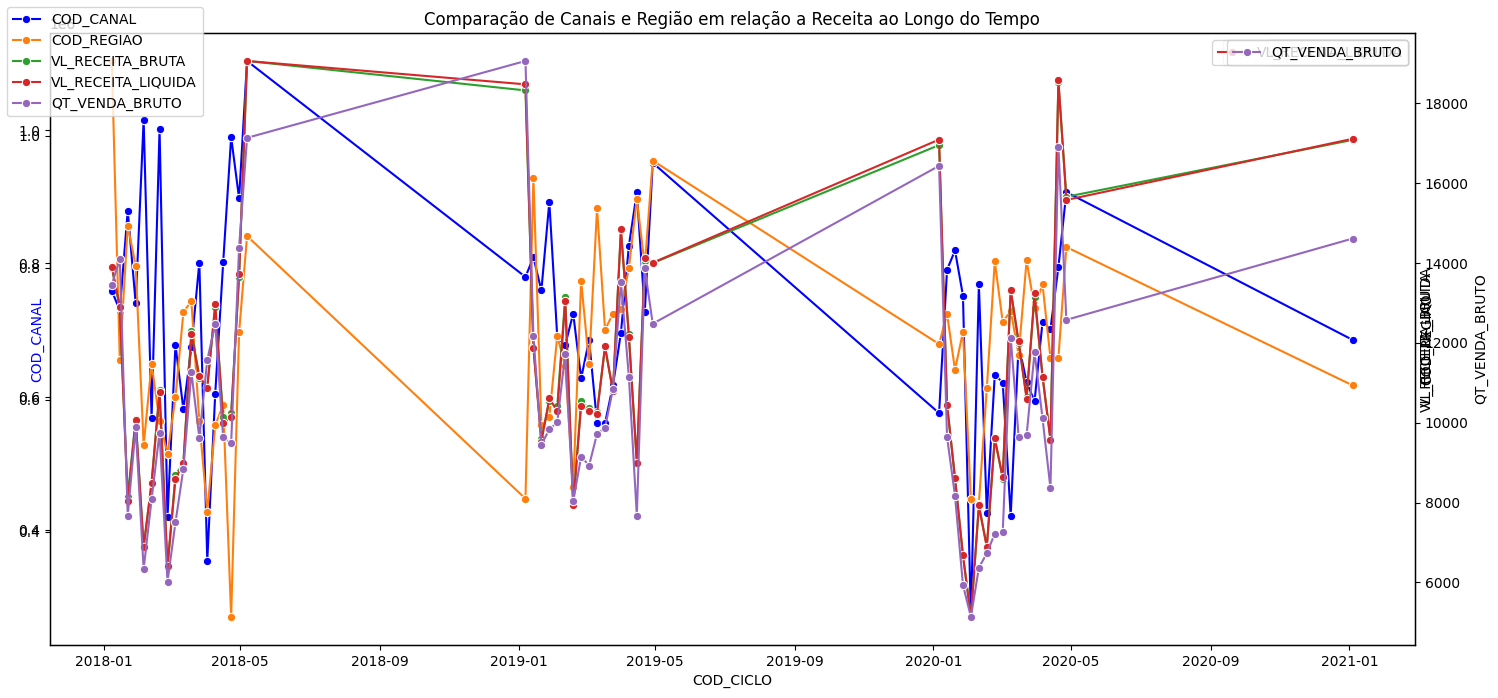

In [30]:
"""
Os canais e a região parecem não ter influência sobre a vendas e receita, pois a dimunição deles não interferiu na receita e
nas vendas
"""

lista_canal_regiao = ['COD_CANAL', 'COD_REGIAO']
lista_receita = ['VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA', 'QT_VENDA_BRUTO']

plot_with_multiple_scales_seaborn(df, lista_canal_regiao + lista_receita, 'COD_CICLO', 'Canais e Região em relação a Receita')

## 5.5.  Análise do Categoria e Marca em relação a Receita e Vendas ao longo do tempo

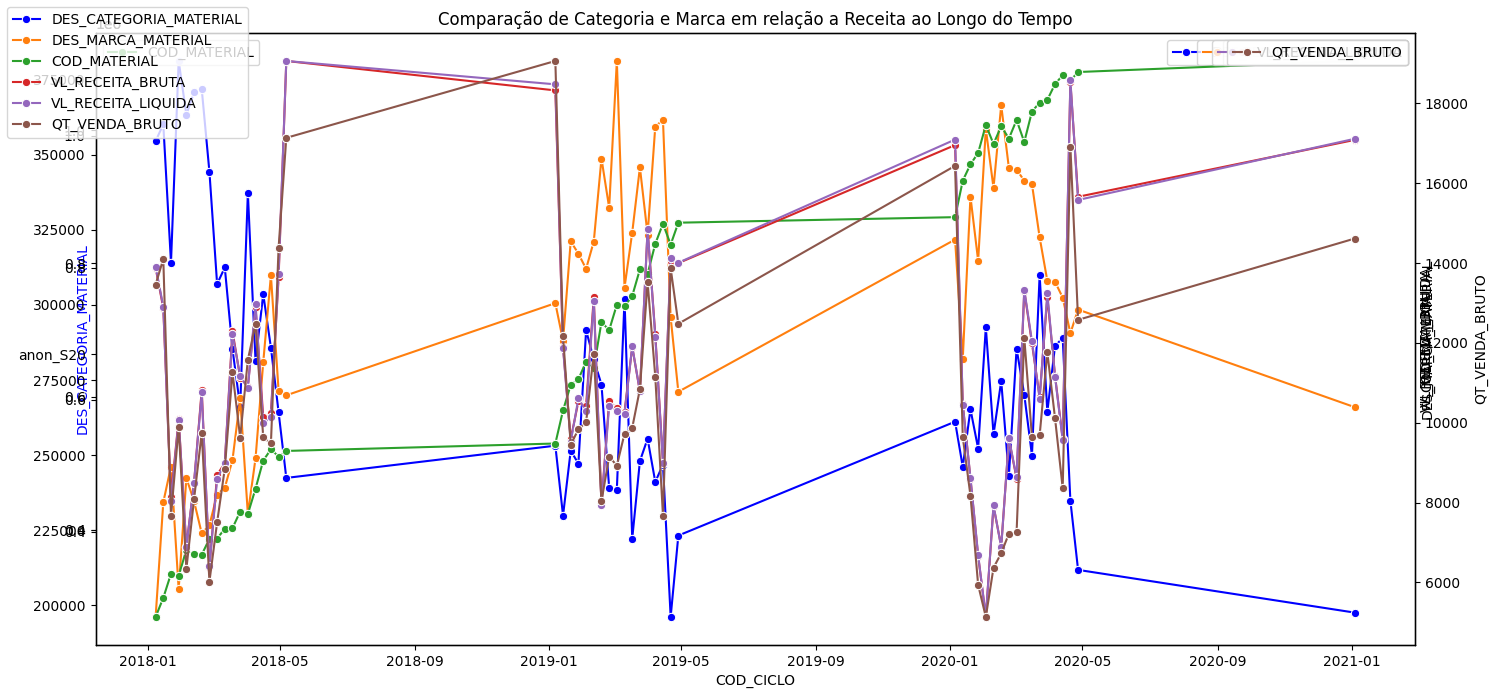

In [31]:
"""
O DES_CATEGORIA_MATERIAL E DES_MARCA_MATERIAL tem influência sobre a vendas e receita, pois a dimunição deles interferiu
na receita e nas vendas, como podemos ver no segundo semestre de 2020
A quantidade de COD_MATERIAL tem influência sobre a vendas e receita, pois ao aumentar a quantidade também aumenta as vendas e receita

"""


lista_categoria_marca = ['DES_CATEGORIA_MATERIAL', 'DES_MARCA_MATERIAL', 'COD_MATERIAL']
lista_receita = ['VL_RECEITA_BRUTA', 'VL_RECEITA_LIQUIDA', 'QT_VENDA_BRUTO']

plot_with_multiple_scales_seaborn(df, lista_categoria_marca + lista_receita, 'COD_CICLO', 'Categoria e Marca em relação a Receita')